# Estimates of Location 

### Example: Location Estimates of Population and Murder Rates

In [2]:
from statsmodels import robust

In [3]:
import pandas as pd
state = pd.read_csv("../Dataset/state.csv")
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

In [4]:
Mean_Population = state['Population'].mean()
print("Mean Population:", Mean_Population)

Mean Population: 6162876.3


In [5]:
state['Population'].shape

(50,)

In [6]:
from scipy.stats import trim_mean
Trimmed_Mean_Population = trim_mean(state['Population'], proportiontocut=0.1)
print("Trimmed Mean Population:", Trimmed_Mean_Population)

# proportiontocut = 0.1, it means 
# Cut 10% of the data from the bottom and 10% from the top of the sorted list.
# Count the data points (n). The state.csv dataset typically has 50 states (for the US). So, n = 50
# p = n * proportiontocut
# p = 50 * 0.1
# p = 5

Trimmed Mean Population: 4783697.125


In [7]:
Median_Population = state['Population'].median()
print("Median Population:", Median_Population)

Median Population: 4436369.5


In [8]:
print("Mean Population:", Mean_Population)
print("Trimmed Mean Population:", Trimmed_Mean_Population)
print("Median Population:", Median_Population)

Mean Population: 6162876.3
Trimmed Mean Population: 4783697.125
Median Population: 4436369.5


The mean is bigger than the trimmed mean, which is bigger than the median.
 This is because the trimmed mean excludes the largest and smallest five states
 (trim=0.1 drops 10% from each end). 

If we want to compute the average murder rate
 for the country, we need to use a weighted mean or median to account for different
 populations in the states.

In [9]:
import wquantiles
import numpy as np

# Weight Median 
MurderRate_Country_WeightMedian = wquantiles.median(state['Murder.Rate'], weights=state['Population'])

# Weight Mean 
MurderRate_Country_Mean = np.average(state['Murder.Rate'], weights=state['Population'])
# We use a weighted mean because states have different numbers of people, 
# so bigger states should have a bigger impact on the final average.


print(MurderRate_Country_WeightMedian)
print(MurderRate_Country_Mean)
#  In this case, the weighted mean and the weighted median are about the same.

4.4
4.445833981123393


Since they are about the same in this case, the main analysis is that the distribution of the US population across different state murder rates is relatively symmetrical and not heavily skewed.

### Insights into **Data Distribution Shape** (by comparing Mean, Median, Mode)

By comparing these three measures, you can gain initial insights into the overall shape or skewness of your data's distribution:

---
* **Symmetric (Normal) Distribution:** If the **mean, median, and mode are approximately equal** (or very close), the data is likely symmetrically distributed, often resembling a bell curve.
---
* **Positively Skewed (Right-skewed):** If the **Mean > Median > Mode**, the data has a "tail" extending to the right. This means there are some unusually high values pulling the mean towards the right, away from the median. (e.g., income data, where a few very rich individuals pull the average up).
---
* **Negatively Skewed (Left-skewed):** If the **Mean < Median < Mode**, the data has a "tail" extending to the left. This means there are some unusually low values pulling the mean towards the left. (e.g., scores on a very easy exam where most students score high).

# Estimates of Variability

### Example: Variability Estimates of State Population

What we can analyze from Estimates of Variability ? 

We can analyze how each column of dataset low variable or high variable. 

Here's the key differences between high and low variability:
<br><br>

High Variability 📈

High variability means that the data points within a dataset or column are widely spread out from the central tendency (like the mean or median). This indicates a large range of values and that individual observations are quite different from each other. The average or typical value is less representative of the overall data because of this wide dispersion. It suggests less consistency, higher diversity, and often greater uncertainty or risk in outcomes.

<br><br>

Low Variability 📉

Low variability means that the data points within a dataset or column are tightly clustered around the central tendency. This indicates a small range of values and that individual observations are very similar to each other. The average or typical value is highly representative of the overall data because of this close grouping. It suggests high consistency, less diversity, and often greater predictability or stability in outcomes.

In [10]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [11]:
print(f"Standard Deviation of Population: {state['Population'].std()}")

Standard Deviation of Population: 6848235.347401142


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [12]:
print(f"IQR : {state['Population'].quantile(0.75) - state['Population'].quantile(0.25)}")

IQR : 4847308.0


Median absolute deviation from the median can be calculated with a method in *statsmodels*

In [13]:
# Method 1 
print(f"Method 1 of Median Absolute Deviation (MAD) : {robust.scale.mad(state['Population'])}")

# Method 2 
print(f"Method 2 of Median Absolute Deviation (MAD) : {abs(state['Population']-state['Population'].median()).median() / 0.6744897501960817}")

Method 1 of Median Absolute Deviation (MAD) : 3849876.1459979336
Method 2 of Median Absolute Deviation (MAD) : 3849876.1459979336


In [14]:
# Method to Calculate Coefficient of Variation (CV)

mean_val = state['Population'].mean()
std_val = state['Population'].std()

CV = (mean_val/std_val) * 100 
print(f"Thus the Coefficient of Variation of Pupulation is : {CV:.2f}%")

Thus the Coefficient of Variation of Pupulation is : 89.99%


### General CV Interpretation Guidelines

* **CV < 10% (0.10): Very Low Variability 📉**
    * **Interpretation:** Data points are extremely close to the mean.
    * **Implication:** The data is highly consistent and predictable. The mean is a very reliable and representative measure of the data. This is often desired in quality control or precise scientific measurements.

---

* **10% $\le$ CV < 20% (0.10 to 0.20): Low Variability ⬇️**
    * **Interpretation:** Data points are reasonably clustered around the mean.
    * **Implication:** Good consistency and predictability. The mean is a good representative measure.

---

* **20% $\le$ CV < 30% (0.20 to 0.30): Moderate Variability ↔️**
    * **Interpretation:** Data points show a noticeable spread around the mean.
    * **Implication:** There's some variation, and while the mean is still useful, there's more diversity in the data. You might start considering the implications of this spread more closely.

---

* **30% $\le$ CV < 50% (0.30 to 0.50): High Variability ⬆️**
    * **Interpretation:** Data points are significantly dispersed from the mean.
    * **Implication:** The data is quite inconsistent, and individual observations deviate substantially from the average. The mean may not fully capture the range of values, and you should definitely investigate the distribution more deeply.

---

* **CV $\ge$ 50% (0.50): Very High Variability 📈**
    * **Interpretation:** The standard deviation is 50% or more of the mean, indicating extreme dispersion.
    * **Implication:** The data is highly erratic. The mean is likely a poor representation of the "typical" value, as the data is spread across a very wide range. This often points to significant outliers, multiple underlying subgroups, or an unstable process. For predictive modeling, such high variability in a feature can make it challenging for models to find clear, stable patterns.

# Exploring the Data Distribution 

## Percentiles and Boxplots 

In [15]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

### 📖 Story-Telling: Understanding the 5th Percentile in "Murder_Rate"

The **5th percentile (0.05 quantile)** of the `"Murder_Rate"` column indicates that **5% of the data points** in that column have a **murder rate less than or equal to 1.6**.

✅ This means:
- If we sort all the murder rates from lowest to highest,
- The value at the 5th percentile is **1.6**,
- So **5% of the observations (rows)** have a murder rate **≤ 1.6**,
- And the remaining **95% of the data** have murder rates **above 1.6**.

🔍 In this case, each "data point in the column" refers to a **murder rate value** for a particular region or observation.

🧠 This helps us understand how murder rates are distributed and identify unusually low values compared to the rest of the data.


In [16]:
# Table 1.4 
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
df.transpose

<bound method DataFrame.transpose of        Murder.Rate
5.0%         1.600
25.0%        2.425
50.0%        4.000
75.0%        5.550
95.0%        6.510>

<function matplotlib.pyplot.show(close=None, block=None)>

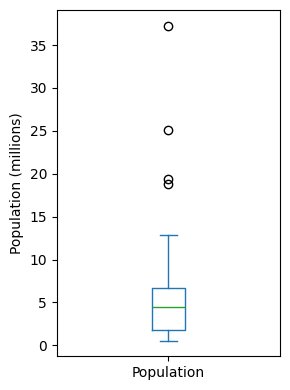

In [17]:
import matplotlib.pyplot as plt 

ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show 

 Any data outside of the whiskers is plotted as single points or circles (often consid
ered outliers).

## Frequency Tables and Histograms

The `cut` method for *pandas* data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` return a frequency table. 

In [18]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [19]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

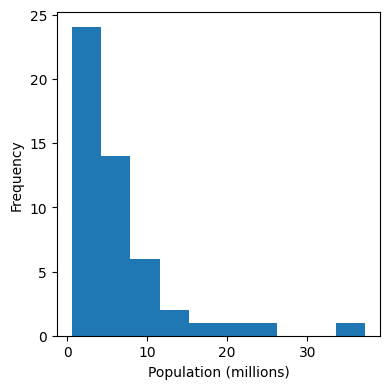

In [20]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

### Story Telling : 

Based on the histogram, the distribution appears to be right-skewed (positively skewed). This is indicated by the longer tail extending towards the higher values of population (millions), while the bulk of the data is concentrated on the left side.

## Density Estimates 

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve. 

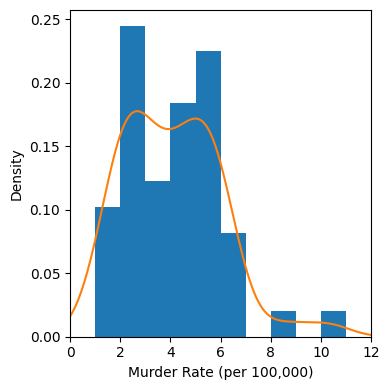

In [21]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1,12), figsize=(4,4))

state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# Exploring Binary and Categorical Data

### Key : 
Expected value: is a simple way to find the average outcome you’d expect if you repeated an event many times. (Use for Categorical Data)

In [22]:
# Table 1-6
dfw = pd.read_csv('../Dataset/dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


### Story Telling : 
Shows the percentage of delayed
 flights by the cause of delay at Dallas/Fort Worth Airport since 2010.

*Pandas* also supports bar charts for displaying a single categorical variable. 

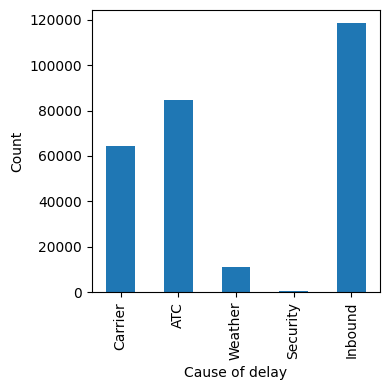

In [23]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation
First read the required datasets

In [26]:
sp500_sym = pd.read_csv("../Dataset/sp500_sectors.csv")
sp500_px = pd.read_csv("../Dataset/sp500_data.csv.gz", index_col=0)

In [27]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]



Next we focus on funds traded on major exchanges (sector == 'etf').

In [28]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

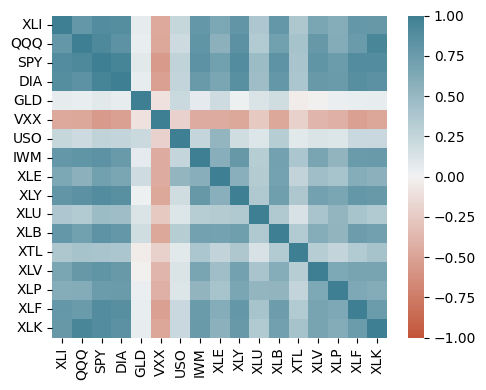

In [31]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

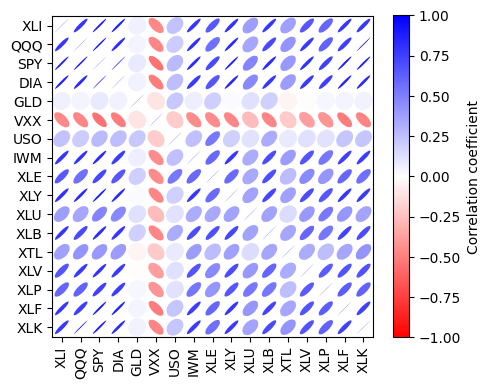

In [32]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = plt.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Note : 
Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data.

## Scatterplots
Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

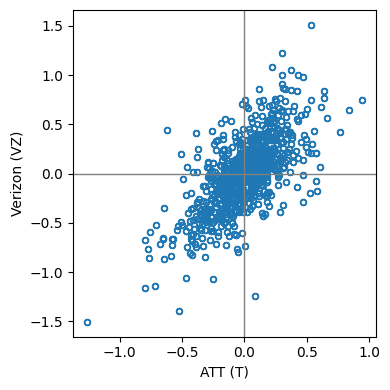

In [33]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_child2)


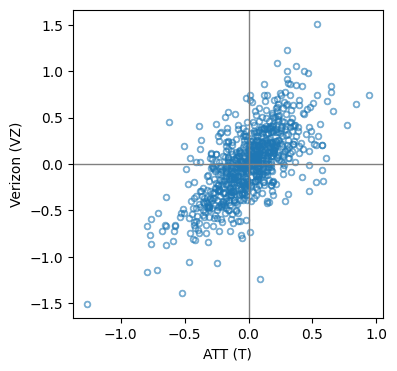

In [34]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

# Exploring Two or More Variables
Load the kc_tax dataset and filter based on a variety of criteria

In [36]:
kc_tax = pd.read_csv("../Dataset/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


## Hexagonal binning and Contours 
### Plotting numeric versus numeric data

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

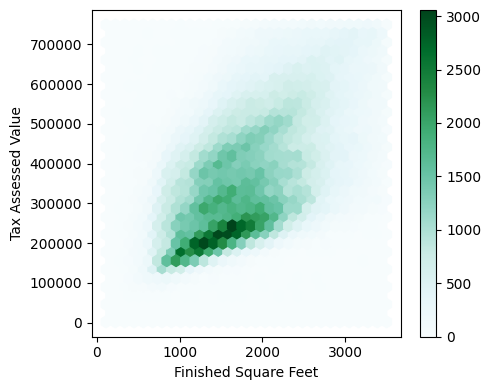

In [37]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The seaborn kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved.

## Two Categorical Variables
Load the `lc_loans` dataset

In [44]:
lc_loans = pd.read_csv("../Dataset/lc_loans.csv")
lc_loans.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


In [46]:
# Table 1-8 Contingency table of loan grade and status
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [47]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:].astype(float)
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## Categorical and Numeric Data
_Pandas_ boxplots of a column can be grouped by a different column.

In [49]:
airline_stats = pd.read_csv("../Dataset/airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


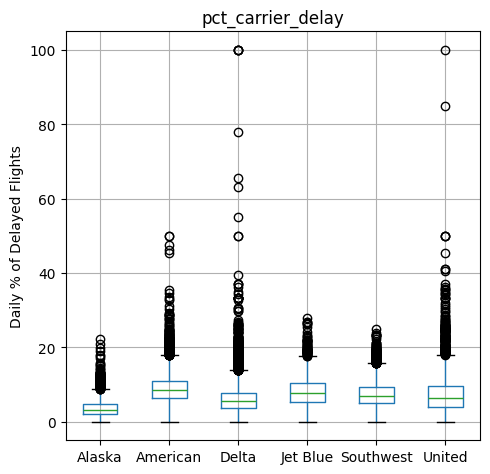

In [50]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

## Visualizing Multiple Variables

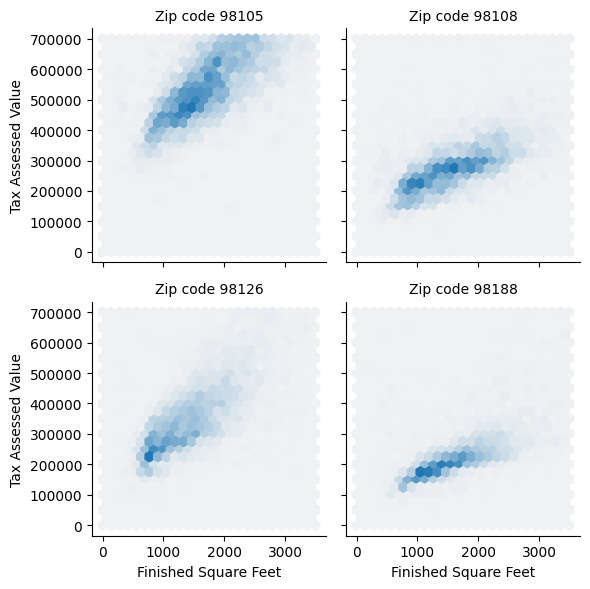

In [51]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()